### 0-9 까지 숫자의 손글씨 이미지 데이터를 분류하는 모델을 만들어보자

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
len(data)

2

In [4]:
# 데이터가 3차원배열로 크게는 train,test 2개로 나뉘어져있고 각 train,test안에 문제와 정답으로 나뉨
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
print(len(data[0]))         # train
print(len(data[1]))         # test
print(len(data[0][0]))      # X_train
print(len(data[0][1]))      # y_train
print(len(data[1][0]))      # X_test
print(len(data[1][1]))      # y_test

2
2
60000
60000
10000
10000


In [6]:
X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

In [7]:
# 이미지라는 2차원 데이터를 다루기 때문에 shape가 3칸씩 나오게 됨 (데이터 수, 가로픽셀 수, 세로픽셀 수)
print(X_train.shape) # 28x28 => pixel => 픽셀하나당 값이 다 다름
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


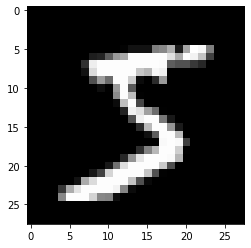

In [8]:
# im: image 약자
# 이미지 데이터를 출력해주는 명령
# cmap = 'gray': 이미지 흑백으로 전환
plt.imshow(X_train[0], cmap = 'gray')

- 이미지 데이터의 입력층 설정 (input_dim = 28x28 = 784)
- 출력층 설정(레이블의 개수만큼 뉴런의 개수를 생성 -> 0-9까지 -> 10개
 - 다중분류 활성화 함수 : softmax

- MLP는 입력 데이터가 1차원 이어야함 (이미지는 2차원)
 - reshape 명령을 사용

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

- 정답 데이터를 확률 정보로 변경하기
 - to_categorical : keras에서 지원해주는 명령(=원핫인코딩)
 - 원핫인코딩

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train_one_hot = to_categorical(y_train) # pd.get_dummies(y_train)
y_test_one_hot = to_categorical(y_test)

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
# reshape : 데이터의 차원을 변경시켜주는 명령
X_train = X_train.reshape(60000,-1) # -1은 6만을 제외한 나머지 차원 값들을 일렬로 펴줌
X_test = X_test.reshape(10000,-1)

In [14]:
X_train.shape, y_train_one_hot.shape

((60000, 784), (60000, 10))

### 신경망 구조 설계 직접해보기

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
# 1. 신경망 구조 설계
# 이미지에선 층 쌓는게 중요인자
model = Sequential()

# 입력층
model.add(Dense(10, input_dim=784, activation="sigmoid"))

# 중간층
model.add(Dense(40, activation="sigmoid"))
model.add(Dense(80, activation="sigmoid"))
model.add(Dense(40, activation="sigmoid"))

# 출력층
model.add(Dense(10, activation="softmax"))

# summary() : 신경망의 층별, 전체 정보를 요약해서 표시
model.summary()

# params 입력 출력 곱하고 출력 자체 더해줌

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                440       
_________________________________________________________________
dense_2 (Dense)              (None, 80)                3280      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                410       
Total params: 15,220
Trainable params: 15,220
Non-trainable params: 0
_________________________________________________________________


In [23]:
# 2. 학습/평가 방법 설정
# categorical_crossentropy: 다중 분류에 사용하는 손실함수(비용함수)
# optimizer = 최적화 도구
model.compile(loss="categorical_crossentropy",
              optimizer="adam",   # Adam
              metrics=["acc"] # 분류 지표: 정확도
              )

In [24]:
# 3. 학습
h1 = model.fit(X_train, y_train_one_hot, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3668 - acc: 0.8927
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3658 - acc: 0.8943
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4031 - acc: 0.8806
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3772 - acc: 0.8926
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3793 - acc: 0.8915
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3644 - acc: 0.8956
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3603 - acc: 0.8967
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3719 - acc: 0.8938
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3682 - acc: 0.8978
Epoch 10/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3546 - acc: 0.9004
Epoch 11/30
1875/1875 [======

In [19]:
preds = model.predict(X_test)

In [21]:
testScore = model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.3978 - acc: 0.8826


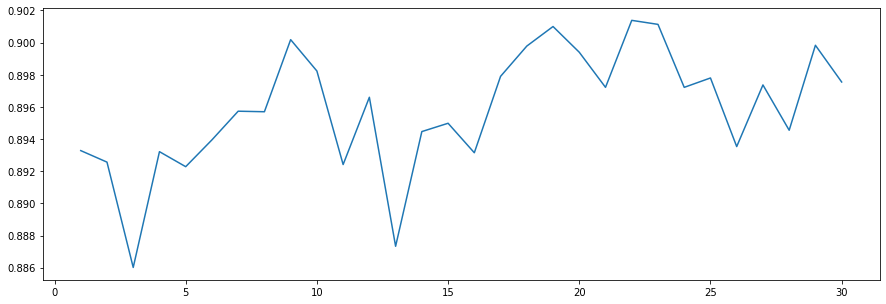

In [25]:
plt.figure(figsize=(15,5))
plt.plot(range(1,31,1),
         h1.history['acc'])
plt.show()

과대적합을 방지하기 위해 train데이터에서 검증셋을 분리해서 학습시 같이 출력해보자~!

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# train 데이터에서 train과 validation(검증)으로 분리시켜줌
# train 데이터를 학습 시킬때 검증데이터로 과대적합인지를 직접 확인하기 위함
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(X_train, y_train_one_hot)

In [29]:
print(X_train.shape)
print(y_train_one_hot.shape)
print(X_val.shape)
print(y_val_one_hot.shape)

(45000, 784)
(45000, 10)
(15000, 784)
(15000, 10)


In [31]:
# 1. 신경망 구조 설계
# 이미지에선 층 쌓는게 중요인자
model2 = Sequential()

# 입력층
model2.add(Dense(10, input_dim=784, activation="sigmoid"))

# 중간층
model2.add(Dense(40, activation="sigmoid"))
model2.add(Dense(80, activation="sigmoid"))
model2.add(Dense(40, activation="sigmoid"))

# 출력층
model2.add(Dense(10, activation="softmax"))

# summary() : 신경망의 층별, 전체 정보를 요약해서 표시
model2.summary()

# params 입력 출력 곱하고 출력 자체 더해줌

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_6 (Dense)              (None, 40)                440       
_________________________________________________________________
dense_7 (Dense)              (None, 80)                3280      
_________________________________________________________________
dense_8 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                410       
Total params: 15,220
Trainable params: 15,220
Non-trainable params: 0
_________________________________________________________________


In [32]:
# 2. 학습/평가 방법 설정
# categorical_crossentropy: 다중 분류에 사용하는 손실함수(비용함수)
# optimizer = 최적화 도구
model2.compile(loss="categorical_crossentropy",
              optimizer="adam",   # Adam
              metrics=["acc"] # 분류 지표: 정확도
              )

In [33]:
# 3. 학습
# 검증용 데이터를 삽입해서 과대적합 방지
h2 = model2.fit(X_train, y_train_one_hot, validation_data = (X_val,
                                                             y_val_one_hot),epochs=30)

Epoch 1/30
1407/1407 [==============================] - 5s 3ms/step - loss: 1.9579 - acc: 0.2992 - val_loss: 1.1242 - val_acc: 0.6282
Epoch 2/30
1407/1407 [==============================] - 4s 3ms/step - loss: 1.0214 - acc: 0.6747 - val_loss: 0.9276 - val_acc: 0.6970
Epoch 3/30
1407/1407 [==============================] - 5s 3ms/step - loss: 0.8599 - acc: 0.7228 - val_loss: 0.8726 - val_acc: 0.7144
Epoch 4/30
1407/1407 [==============================] - 5s 3ms/step - loss: 0.8098 - acc: 0.7507 - val_loss: 0.7829 - val_acc: 0.7553
Epoch 5/30
1407/1407 [==============================] - 4s 3ms/step - loss: 0.7573 - acc: 0.7830 - val_loss: 0.7646 - val_acc: 0.7715
Epoch 6/30
1407/1407 [==============================] - 5s 3ms/step - loss: 0.7078 - acc: 0.8031 - val_loss: 0.6864 - val_acc: 0.8061
Epoch 7/30
1407/1407 [==============================] - 5s 3ms/step - loss: 0.6650 - acc: 0.8069 - val_loss: 0.6505 - val_acc: 0.8173
Epoch 8/30
1407/1407 [==============================] - 5s 3ms

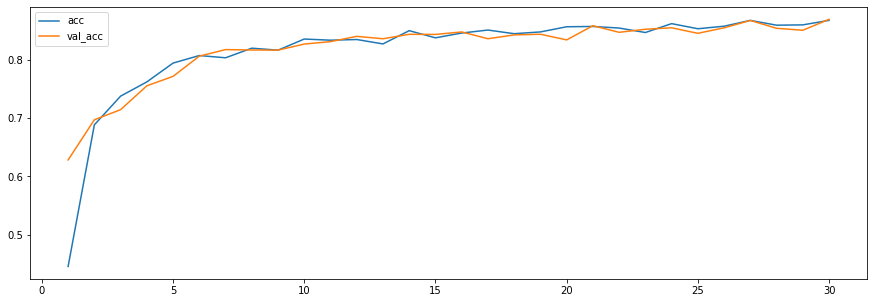

In [35]:
plt.figure(figsize=(15,5))
plt.plot(range(1,31,1),
         h2.history['acc'],
         label = 'acc'
         )

plt.plot(range(1,31,1),
         h2.history['val_acc'],
         label = 'val_acc'
         )

plt.legend()
plt.show()

In [36]:
model2.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.4648 - acc: 0.8739


[0.46477967500686646, 0.8738999962806702]